# Machine Learning project on house price prediction using the Linear Regression

# importing the modules

In [31]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# reading csv file and checking for null data

In [6]:
data =pd.read_csv(r"C:\Users\HP\Downloads\archive (5).zip")
data.isnull().sum()
data.drop(['sqft_above'], axis ='columns' , inplace =True)
conv_dates =[1 if values == 2014 else 0 for values in data.date]
data['date']=conv_dates

In [7]:
data.head()

id  date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520     0  221900.0         3       1.00         1180      5650   
1  6414100192     0  538000.0         3       2.25         2570      7242   
2  5631500400     0  180000.0         2       1.00          770     10000   
3  2487200875     0  604000.0         4       3.00         1960      5000   
4  1954400510     0  510000.0         3       2.00         1680      8080   

   floors  waterfront  view  condition  grade  sqft_basement  yr_built  \
0     1.0           0     0          3      7              0      1955   
1     2.0           0     0          3      7            400      1951   
2     1.0           0     0          3      6              0      1933   
3     1.0           0     0          5      7            910      1965   
4     1.0           0     0          3      8              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  int64  
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [34]:
data.describe()

id     date         price      bedrooms     bathrooms  \
count  2.161300e+04  21613.0  2.161300e+04  21613.000000  21613.000000   
mean   4.580302e+09      0.0  5.400881e+05      3.370842      2.114757   
std    2.876566e+09      0.0  3.671272e+05      0.930062      0.770163   
min    1.000102e+06      0.0  7.500000e+04      0.000000      0.000000   
25%    2.123049e+09      0.0  3.219500e+05      3.000000      1.750000   
50%    3.904930e+09      0.0  4.500000e+05      3.000000      2.250000   
75%    7.308900e+09      0.0  6.450000e+05      4.000000      2.500000   
max    9.900000e+09      0.0  7.700000e+06     33.000000      8.000000   

        sqft_living      sqft_lot        floors    waterfront          view  \
count  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean    2079.899736  1.510697e+04      1.494309      0.007542      0.234303   
std      918.440897  4.142051e+04      0.539989      0.086517      0.766318   
min      290.000000  5.200000e+02      1.000000      0.000000      0.000000   
25%     1427.000000  5.040000e+03      1.000000      0.000000      0.000000   
50%     1910.000000  7.618000e+03      1.500000      0.000000      0.000000   
75%     2550.000000  1.068800e+04      2.000000      0.000000      0.000000   
max    13540.000000  1.651359e+06      3.500000      1.000000      4.000000   

          condition         grade  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       3.409430      7.656873     291.509045   1971.005136     84.402258   
std        0.650743      1.175459     442.575043     29.373411    401.679240   
min        1.000000      1.000000       0.000000   1900.000000      0.000000   
25%        3.000000      7.000000       0.000000   1951.000000      0.000000   
50%        3.000000      7.000000       0.000000   1975.000000      0.000000   
75%        4.000000      8.000000     560.000000   1997.000000      0.000000   
max        5.000000     13.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [35]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

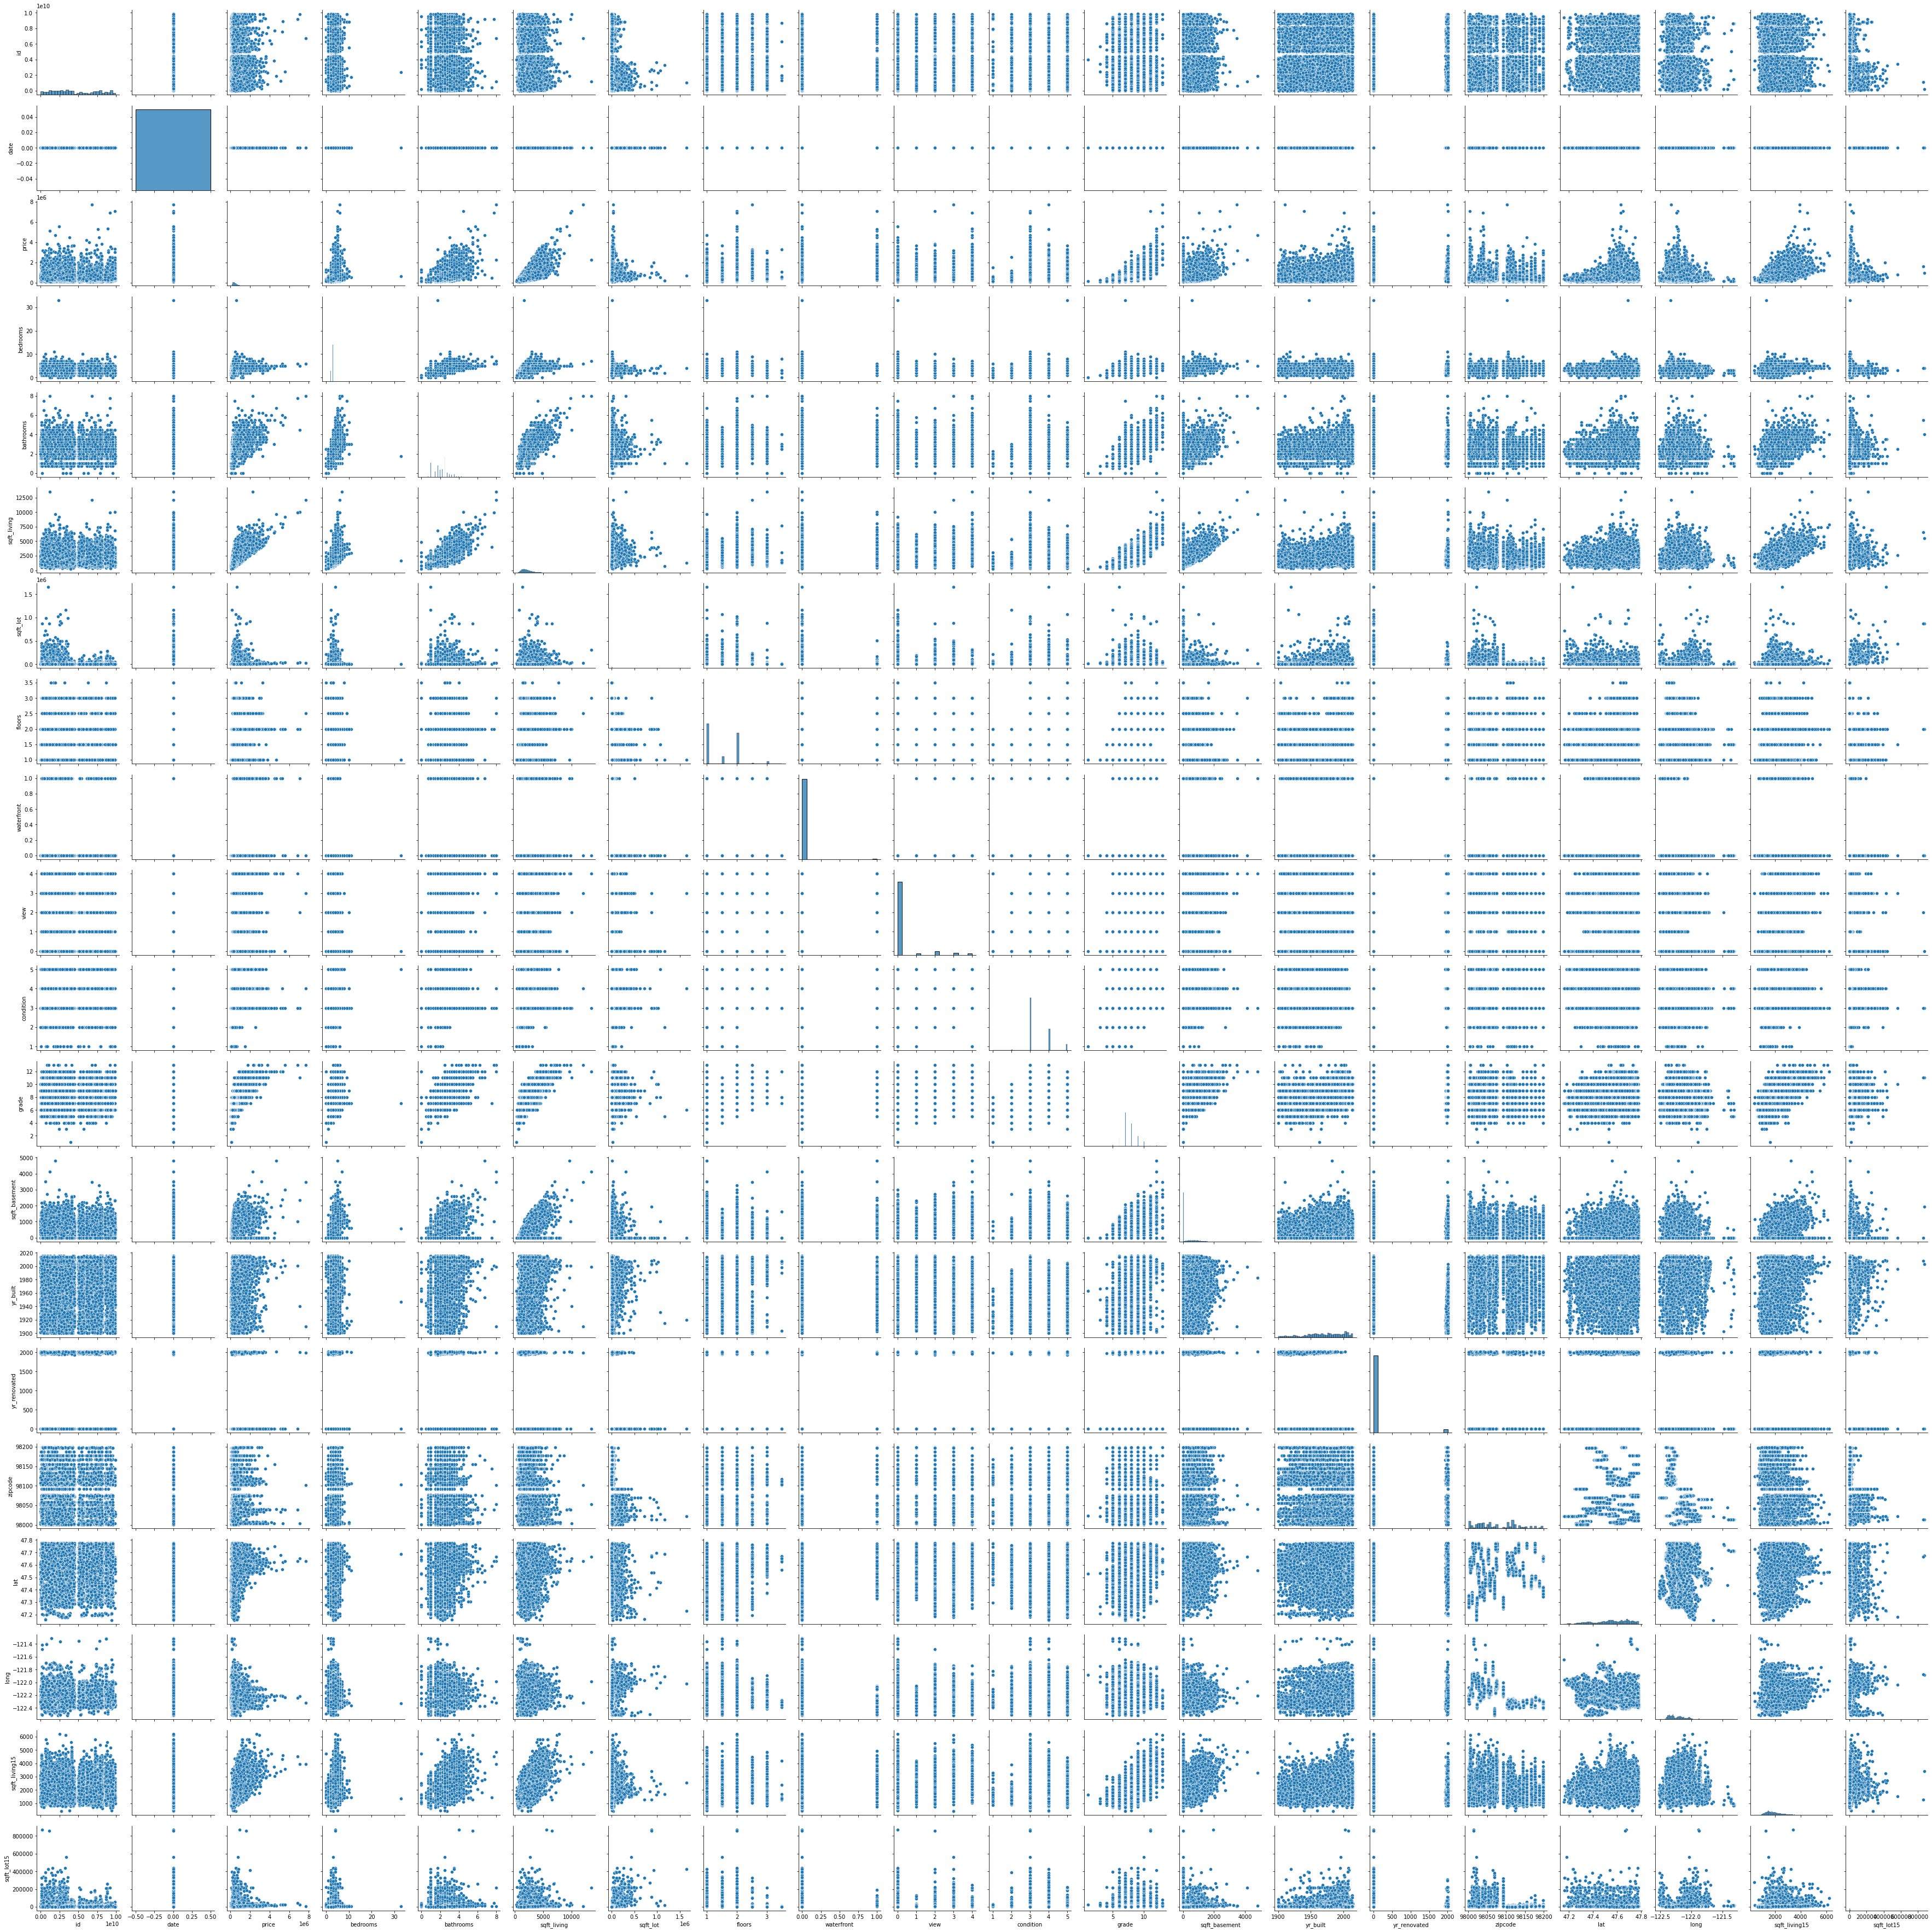

In [37]:
sns.pairplot(data)

<AxesSubplot:>

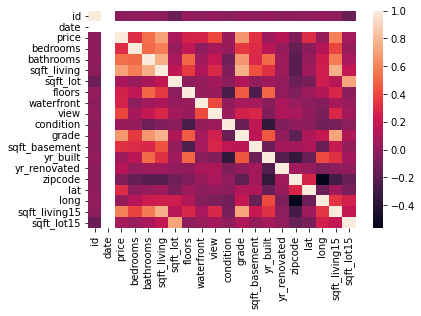

In [42]:
sns.heatmap(data.corr())

# identify the dependent variable (output label) and independent variables (input features)

In [53]:
x =data[['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]

y =data['price']

# split the data into train data and test data 

In [54]:
x_train , x_test , y_train , y_test =train_test_split(x,y, test_size =0.40 ,random_state =101)

In [55]:
x_train
#y_train
#y_test
#x_test

id  date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
2435   7878400135     0         3       2.25         2550      9674     1.0   
256    7972601890     0         4       1.75         2360      7620     1.0   
13911  7517500085     0         3       1.75         1770      2800     1.5   
1135   4024100951     0         7       3.00         2940      8624     1.0   
12181  3216900070     0         4       2.50         2210      7079     2.0   
...           ...   ...       ...        ...          ...       ...     ...   
5695   3578401060     0         3       2.25         1920      9672     2.0   
8006   1250200600     0         3       1.00         1240      3600     1.5   
17745  1545802100     0         3       2.25         1780      7332     2.0   
17931  2979800750     0         2       1.00         1150      5000     1.0   
13151  4365200620     0         3       1.00         1450      7930     1.0   

       waterfront  view  condition  grade  sqft_basement  yr_built  \
2435            0     0          3      7            700      1959   
256             0     0          4      7           1180      1955   
13911           0     0          3      7              0      1914   
1135            0     0          3      8           1250      1977   
12181           0     0          3      8              0      1993   
...           ...   ...        ...    ...            ...       ...   
5695            0     0          4      8              0      1984   
8006            0     0          3      7              0      1902   
17745           0     0          3      7              0      1987   
17931           0     0          4      7            100      1924   
13151           0     0          4      6            300      1923   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
2435              0    98178  47.4856 -122.247           2240        9674  
256               0    98106  47.5278 -122.345           1910        7620  
13911             0    98103  47.6631 -122.357           1630        3254  
1135              0    98155  47.7555 -122.307           1850        8031  
12181             0    98031  47.4206 -122.183           1970        7000  
...             ...      ...      ...      ...            ...         ...  
5695              0    98074  47.6233 -122.046           1950       10125  
8006              0    98144  47.5986 -122.298           1680        3600  
17745             0    98038  47.3593 -122.051           1510        7625  
17931             0    98115  47.6846 -122.317           1463        4320  
13151             0    98126  47.5212 -122.371           1040        7740  

[12967 rows x 19 columns]

# define and train(fit) the linear regression model using training data 

In [56]:
#model training 
lr =LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

# predict the output of the test data using the fitted model

In [57]:
y_predict =lr.predict (x_test)
print (y_predict)
print (y_test)

[ 545318.87052693  641223.51243989  503697.26830409 ... 1518397.83221727
  298002.31524071  311068.89812137]
3834      349950.0
1348      450000.0
20366     635000.0
16617     355500.0
20925     246950.0
           ...    
5036      280000.0
17400     550000.0
2974     2950000.0
8330      315000.0
13297     312000.0
Name: price, Length: 8646, dtype: float64


In [58]:
coeff_df =pd.DataFrame(lr.coef_,x.columns,columns =['coefficient'])

In [59]:
coeff_df

coefficient
id            -1.652437e-06
date          -1.283337e-07
bedrooms      -3.681439e+04
bathrooms      3.584880e+04
sqft_living    1.862174e+02
sqft_lot       1.547750e-01
floors         9.463007e+03
waterfront     5.623785e+05
view           5.251917e+04
condition      2.737819e+04
grade          9.720650e+04
sqft_basement -3.390320e+01
yr_built      -2.640130e+03
yr_renovated   1.795849e+01
zipcode       -5.952833e+02
lat            6.077347e+05
long          -2.188853e+05
sqft_living15  1.792867e+01
sqft_lot15    -3.980442e-01

In [60]:
predictions =lr.predict(x_test)

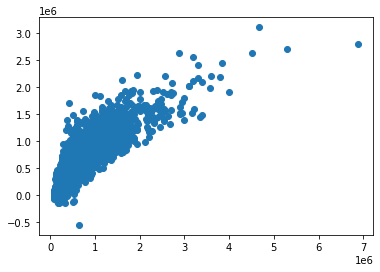

In [72]:
plt.scatter(y_test , predictions )

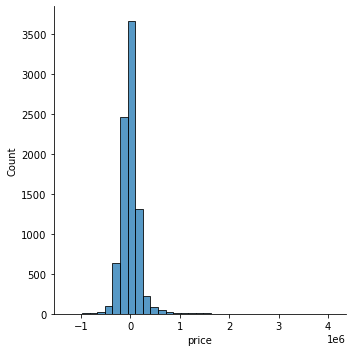

In [69]:
sns.displot((y_test-predictions ),bins =35)